<div align="center">

###### Lab 2

# National Tsing Hua University

#### Spring 2025

#### 11320IEEM 513600

#### Deep Learning and Industrial Applications
    
## Lab 2: Predicting Heart Disease with Deep Learning

</div>

### Introduction

In the realm of healthcare, early detection and accurate prediction of diseases play a crucial role in patient care and management. Heart disease remains one of the leading causes of mortality worldwide, making the development of effective diagnostic tools essential. This lab leverages deep learning to predict the presence of heart disease in patients using a subset of 14 key attributes from the Cleveland Heart Disease Database. The objective is to explore and apply deep learning techniques to distinguish between the presence and absence of heart disease based on clinical parameters.

Throughout this lab, you'll engage with the following key activities:
- Use [Pandas](https://pandas.pydata.org) to process the CSV files.
- Use [PyTorch](https://pytorch.org) to build an Artificial Neural Network (ANN) to fit the dataset.
- Evaluate the performance of the trained model to understand its accuracy.

### Attribute Information

1. age: Age of the patient in years
2. sex: (Male/Female)
3. cp: Chest pain type (4 types: low, medium, high, and severe)
4. trestbps: Resting blood pressure
5. chol: Serum cholesterol in mg/dl
6. fbs: Fasting blood sugar > 120 mg/dl
7. restecg: Resting electrocardiographic results (values 0,1,2)
8. thalach: Maximum heart rate achieved
9. exang: Exercise induced angina
10. oldpeak: Oldpeak = ST depression induced by exercise relative to rest
11. slope: The slope of the peak exercise ST segment
12. ca: Number of major vessels (0-3) colored by fluoroscopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
14. target: target have disease or not (1=yes, 0=no)

### References
- [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data) for the dataset we use in this lab.


## A. Checking and Preprocessing

In [1]:
import pandas as pd

df = pd.read_csv('heart_dataset_train_all.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,Male,medium,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,Female,low,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,Female,medium,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,Female,high,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,Female,severe,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,Female,low,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,Female,low,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,Female,high,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,Female,low,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [2]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       273 non-null    int64  
 1   sex       272 non-null    object 
 2   cp        272 non-null    object 
 3   trestbps  272 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       273 non-null    int64  
 6   restecg   272 non-null    float64
 7   thalach   272 non-null    float64
 8   exang     273 non-null    int64  
 9   oldpeak   273 non-null    float64
 10  slope     271 non-null    float64
 11  ca        273 non-null    int64  
 12  thal      272 non-null    float64
 13  target    272 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 30.0+ KB


In [4]:
# checking for null values
df.isnull().sum()

age         0
sex         1
cp          1
trestbps    1
chol        2
fbs         0
restecg     1
thalach     1
exang       0
oldpeak     0
slope       2
ca          0
thal        1
target      1
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.shape

(270, 14)

In [7]:
# Mapping 'sex' descriptions to numbers
sex_description = {
    'Male': 0,
    'Female': 1,
}
df.loc[:, 'sex'] = df['sex'].map(sex_description)

# Mapping 'cp' (chest pain) descriptions to numbers
pain_description = {
    'low': 0,
    'medium': 1,
    'high': 2,
    'severe': 3
}
df.loc[:, 'cp'] = df['cp'].map(pain_description)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,0,1,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,1,0,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,1,1,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,1,2,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,1,3,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,1,0,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,1,0,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,1,2,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,1,0,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [8]:
df.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.385185,131.525926,245.607407,0.151852,0.522222,149.807407,0.333333,1.024074,1.400000,0.744444,2.300000,0.544444
std,9.149713,17.904675,51.529411,0.359544,0.529314,23.217253,0.472280,1.188379,0.618188,1.037166,0.623874,0.498946
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,120.000000,210.250000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,274.000000,0.000000,1.000000,167.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.062222,-0.103697,0.261782,0.210520,0.109847,-0.124588,-0.412624,0.111263,0.200243,-0.165360,0.254462,0.077368,-0.244798
sex,-0.062222,1.000000,-0.040197,-0.055463,-0.166885,0.042384,-0.069599,-0.058626,0.124054,0.089726,-0.038771,0.140795,0.198493,-0.283776
cp,-0.103697,-0.040197,1.000000,0.035563,-0.063592,0.065869,0.008389,0.300307,-0.428233,-0.183616,0.135174,-0.180598,-0.139765,0.425574
trestbps,0.261782,-0.055463,0.035563,1.000000,0.128444,0.170606,-0.145195,-0.056631,0.067116,0.184896,-0.126553,0.093545,0.068690,-0.173239
chol,0.210520,-0.166885,-0.063592,0.128444,1.000000,0.003430,-0.162687,-0.023753,0.063902,0.084355,-0.031929,0.068647,0.121280,-0.096773
fbs,0.109847,0.042384,0.065869,0.170606,0.003430,1.000000,-0.086165,-0.014297,0.029190,0.007943,-0.056866,0.164266,-0.004972,-0.068845
restecg,-0.124588,-0.069599,0.008389,-0.145195,-0.162687,-0.086165,1.000000,0.025457,-0.089225,-0.047837,0.074982,-0.053946,-0.003377,0.101817
thalach,-0.412624,-0.058626,0.300307,-0.056631,-0.023753,-0.014297,0.025457,1.000000,-0.404349,-0.340564,0.370073,-0.205060,-0.078637,0.432687
exang,0.111263,0.124054,-0.428233,0.067116,0.063902,0.029190,-0.089225,-0.404349,1.000000,0.294308,-0.280124,0.106250,0.189253,-0.457502
oldpeak,0.200243,0.089726,-0.183616,0.184896,0.084355,0.007943,-0.047837,-0.340564,0.294308,1.000000,-0.585472,0.223375,0.200315,-0.443504


#### Converting the DataFrame to a NumPy Array

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm.auto import tqdm
import matplotlib.pyplot as plt



# 資料預處理
df = pd.read_csv('heart_dataset_train_all.csv').dropna()
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df['cp'] = df['cp'].map({'low': 0, 'medium': 1, 'high': 2, 'severe': 3})
np_data = df.values
np.random.shuffle(np_data)

In [ ]:
# 切分資料集
split = int(0.7 * len(np_data))
x_train, y_train = np_data[:split, :13], np_data[:split, 13]
x_val, y_val = np_data[split:, :13], np_data[split:, 13]

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
x_val = torch.tensor(x_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)

train_loader = DataLoader(TensorDataset(x_train, y_train), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(x_val, y_val), batch_size=32)



In [ ]:
# 測試資料
test_data = pd.read_csv('heart_dataset_test.csv').values
x_test = torch.tensor(test_data[:, :13], dtype=torch.float32)
y_test = torch.tensor(test_data[:, 13], dtype=torch.long)
test_loader = DataLoader(TensorDataset(x_test, y_test), batch_size=1)

Training with LR=0.01, Hidden=128


  0%|          | 0/200 [00:00<?, ?it/s]

Early stopping at epoch 123


C:\Users\micha\AppData\Local\Temp\ipykernel_29500\3302976172.py:144: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'model_lr{lr}_h{hidden_s

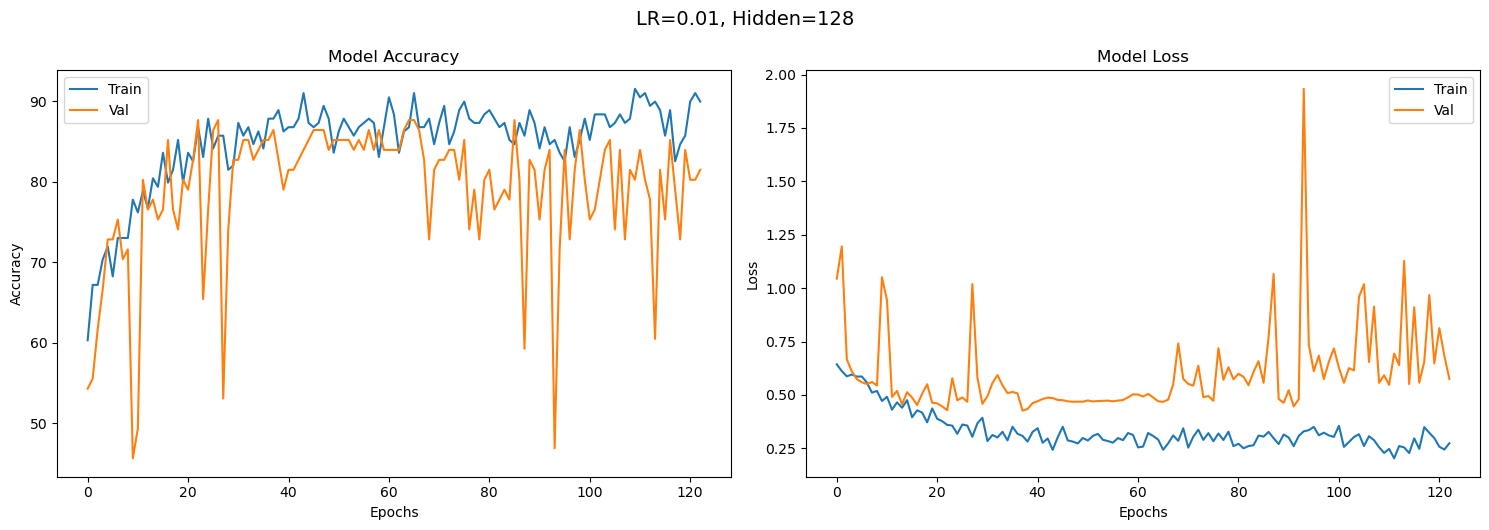

Training with LR=0.01, Hidden=256


  0%|          | 0/200 [00:00<?, ?it/s]

Early stopping at epoch 138


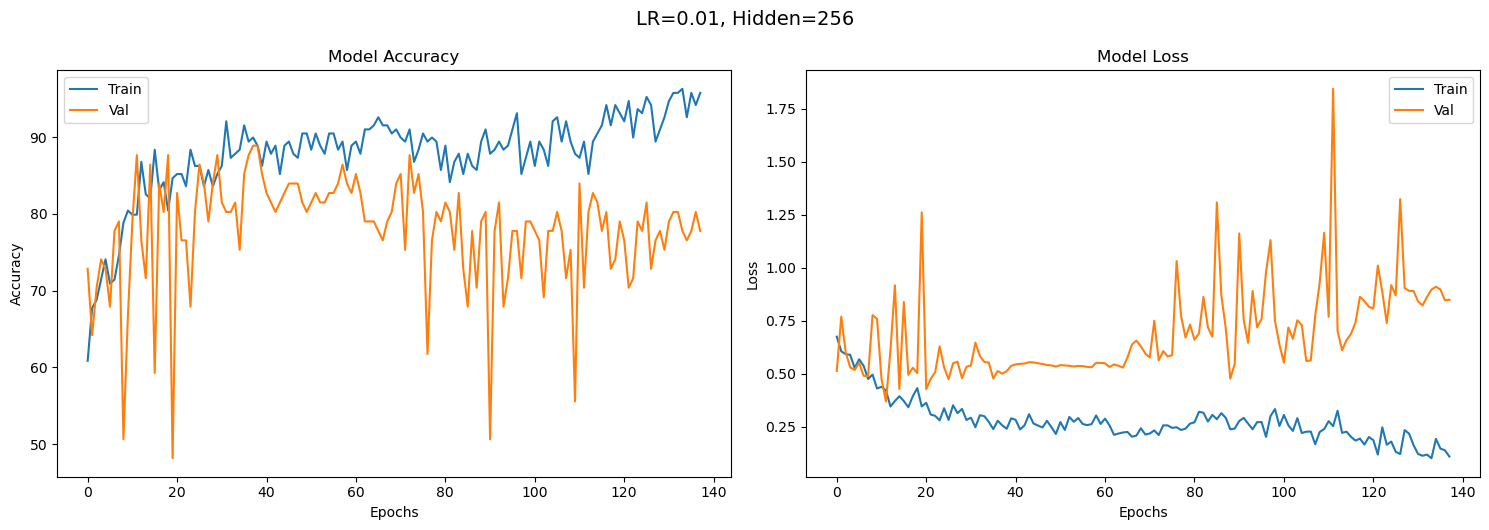

Training with LR=0.01, Hidden=512


  0%|          | 0/200 [00:00<?, ?it/s]

Early stopping at epoch 133


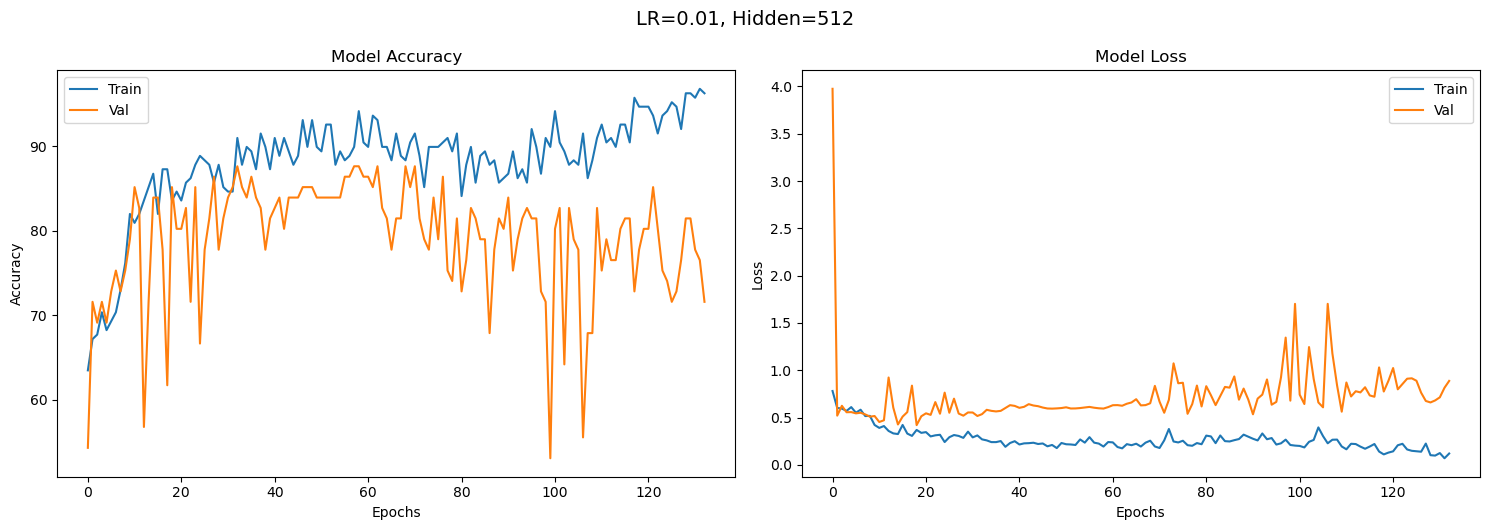

Training with LR=0.001, Hidden=128


  0%|          | 0/200 [00:00<?, ?it/s]

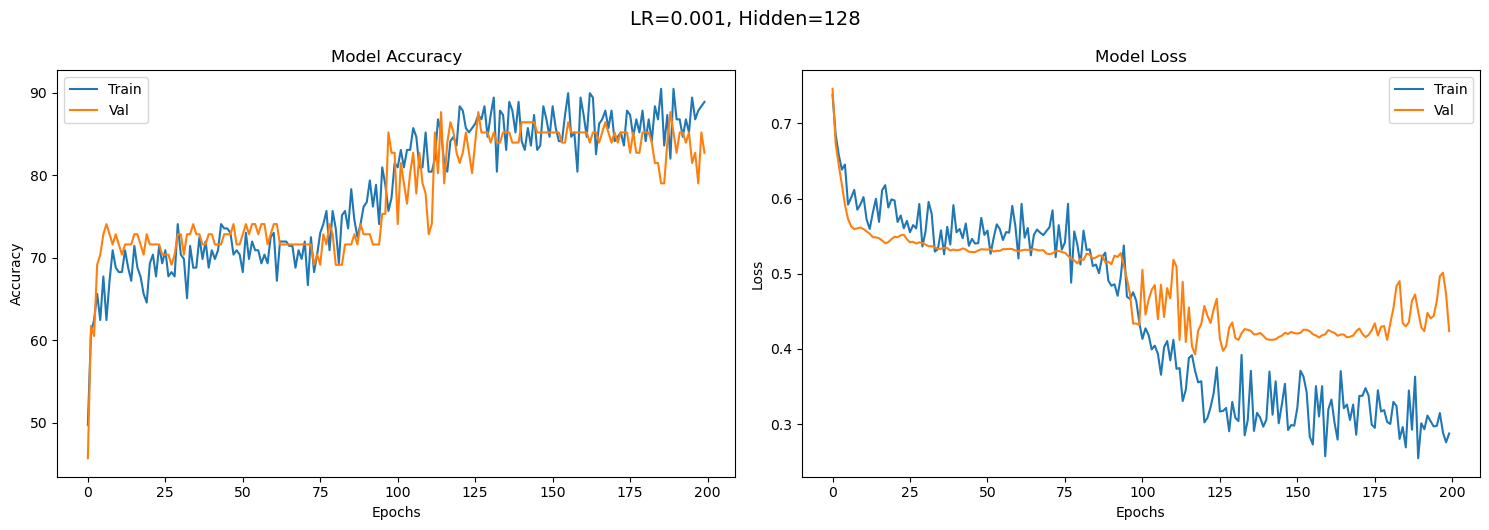

Training with LR=0.001, Hidden=256


  0%|          | 0/200 [00:00<?, ?it/s]

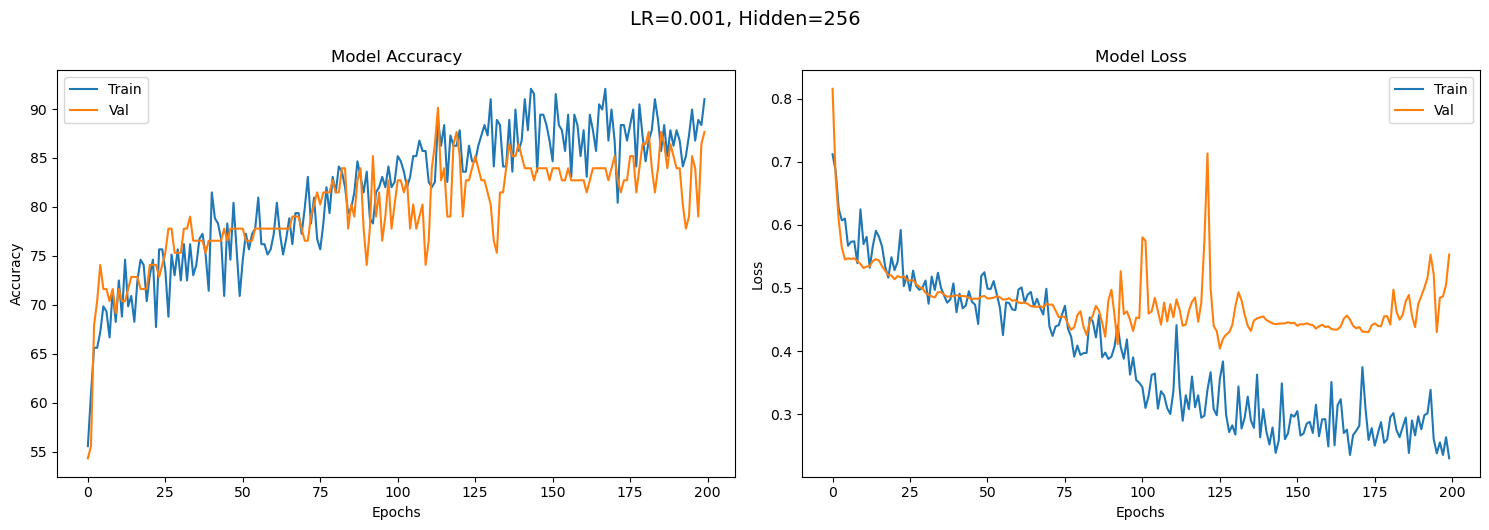

Training with LR=0.001, Hidden=512


  0%|          | 0/200 [00:00<?, ?it/s]

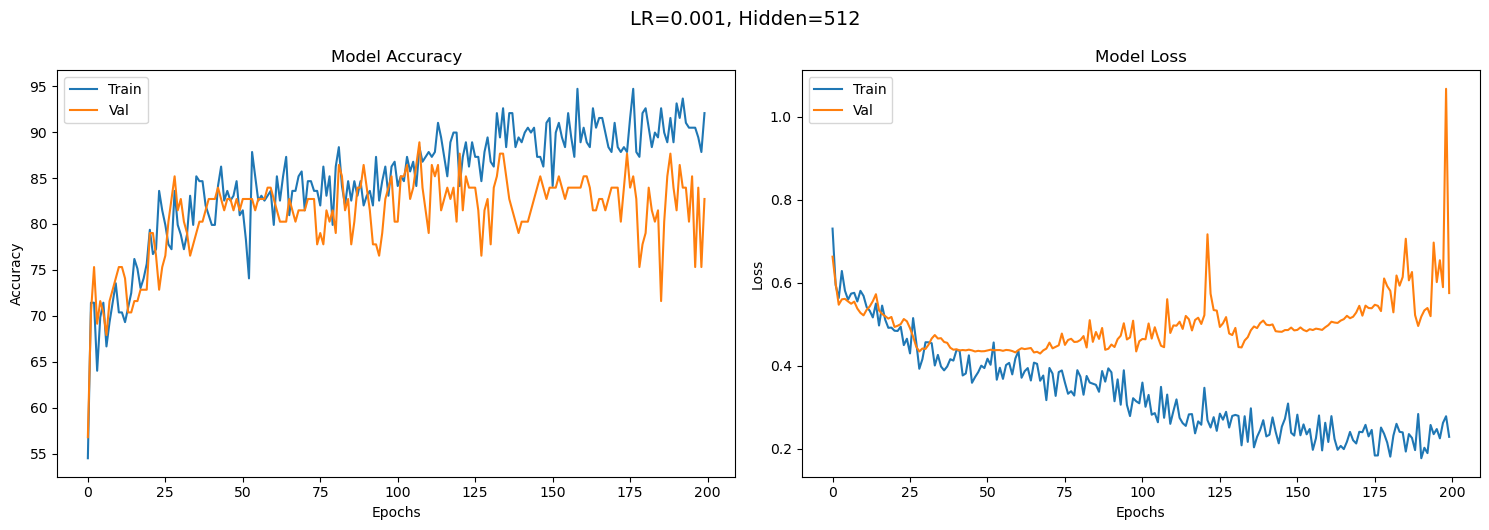

Training with LR=0.0001, Hidden=128


  0%|          | 0/200 [00:00<?, ?it/s]

Early stopping at epoch 132


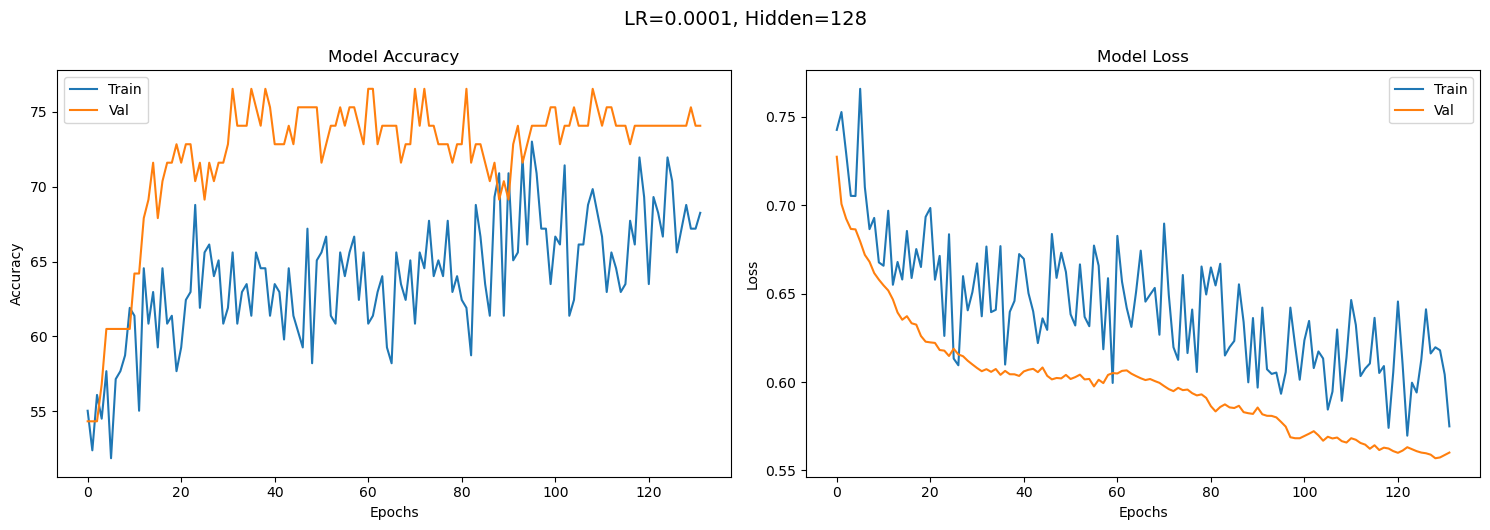

Training with LR=0.0001, Hidden=256


  0%|          | 0/200 [00:00<?, ?it/s]

Early stopping at epoch 188


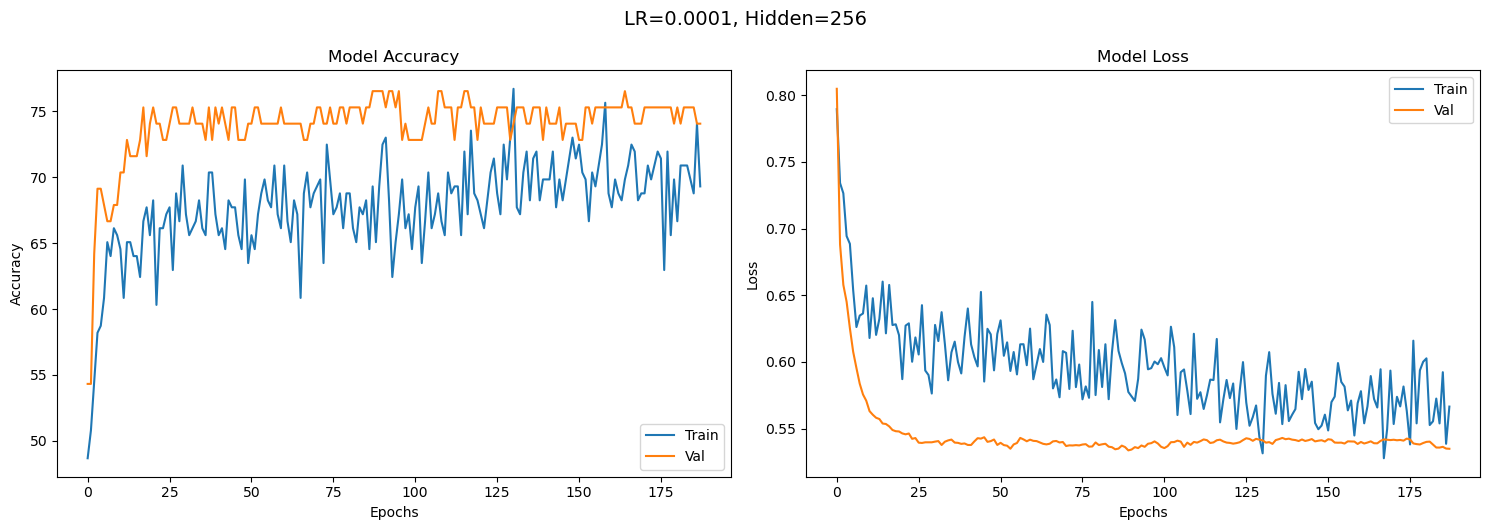

Training with LR=0.0001, Hidden=512


  0%|          | 0/200 [00:00<?, ?it/s]

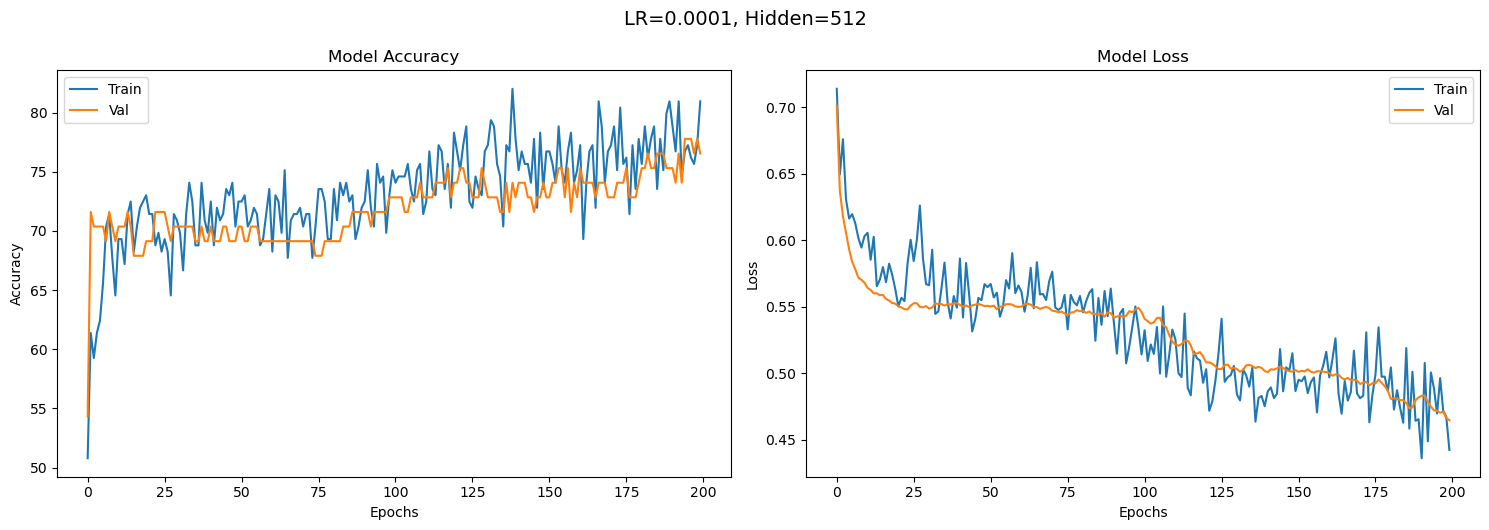

   Learning Rate  Hidden Size  Best Train Loss  Best Train Acc  Best Val Loss  \
0         0.0100          128         0.359596       86.772487       0.428285   
1         0.0100          256         0.256847       89.947090       0.500586   
2         0.0100          512         0.269182       91.005291       0.535897   
3         0.0010          128         0.345607       85.185185       0.409349   
4         0.0010          256         0.289328       88.888889       0.439944   
5         0.0010          512         0.274459       88.359788       0.444611   
6         0.0001          128         0.637226       65.608466       0.606168   
7         0.0001          256         0.599164       69.312169       0.537325   
8         0.0001          512         0.488446       76.719577       0.471968   

   Best Val Acc  Best Test Loss  Best Test Acc  
0     87.654321        0.534456      80.645161  
1     88.888889        0.411361      80.645161  
2     87.654321        0.450579      74.19

In [ ]:

# 模型定義
class Model(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(13, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.LeakyReLU(),
            nn.Dropout(0.3),

            nn.Linear(hidden_size, hidden_size // 2),
            nn.BatchNorm1d(hidden_size // 2),
            nn.LeakyReLU(),
            nn.Dropout(0.3),

            nn.Linear(hidden_size // 2, hidden_size // 4),
            nn.BatchNorm1d(hidden_size // 4),
            nn.LeakyReLU(),
            nn.Dropout(0.3),

            nn.Linear(hidden_size // 4, 2)
        )

    def forward(self, x):
        return self.model(x)

# ====== 可調整區 ======
EPOCHS = 200
PATIENCE = 100
# ======================

# 超參數組合
learning_rates = [0.01, 0.001, 0.0001]
hidden_sizes = [128, 256, 512]
results = []

for lr in learning_rates:
    for hidden_size in hidden_sizes:
        print(f'Training with LR={lr}, Hidden={hidden_size}')
        model = Model(hidden_size)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)
        scheduler = CosineAnnealingLR(optimizer, T_max=50)

        best_val_acc = -1
        best_result = {}
        wait = 0  # early stopping counter

        train_accuracies = []
        val_accuracies = []
        train_losses = []
        val_losses = []

        for epoch in tqdm(range(EPOCHS)):
            model.train()
            total_loss, correct, total = 0.0, 0, 0
            for x, y in train_loader:
                optimizer.zero_grad()
                outputs = model(x)
                loss = criterion(outputs, y)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
                correct += (outputs.argmax(1) == y).sum().item()
                total += y.size(0)
            train_acc = 100. * correct / total
            train_loss = total_loss / len(train_loader)

            model.eval()
            val_loss, val_correct, total = 0.0, 0, 0
            with torch.no_grad():
                for x, y in val_loader:
                    outputs = model(x)
                    loss = criterion(outputs, y)
                    val_loss += loss.item()
                    val_correct += (outputs.argmax(1) == y).sum().item()
                    total += y.size(0)
            val_acc = 100. * val_correct / total
            val_loss /= len(val_loader)

            train_accuracies.append(train_acc)
            val_accuracies.append(val_acc)
            train_losses.append(train_loss)
            val_losses.append(val_loss)

            # Early stopping 檢查
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                wait = 0
                best_result = {
                    'train_loss': train_loss,
                    'train_acc': train_acc,
                    'val_loss': val_loss,
                    'val_acc': val_acc
                }
                torch.save(model.state_dict(), f'model_lr{lr}_h{hidden_size}.pth')
            else:
                wait += 1
                if wait >= PATIENCE:
                    print(f"Early stopping at epoch {epoch+1}")
                    break

            scheduler.step()

        # 測試
        model.load_state_dict(torch.load(f'model_lr{lr}_h{hidden_size}.pth'))
        model.eval()
        test_loss, test_correct = 0.0, 0
        with torch.no_grad():
            for x, y in test_loader:
                outputs = model(x)
                loss = criterion(outputs, y)
                test_loss += loss.item()
                test_correct += (outputs.argmax(1) == y).sum().item()
        test_acc = 100. * test_correct / len(test_loader)
        test_loss /= len(test_loader)

        results.append([
            lr, hidden_size,
            best_result['train_loss'], best_result['train_acc'],
            best_result['val_loss'], best_result['val_acc'],
            test_loss, test_acc
        ])

        # 繪圖
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        ax[0].plot(train_accuracies, label='Train')
        ax[0].plot(val_accuracies, label='Val')
        ax[0].set_title('Model Accuracy')
        ax[0].set_xlabel('Epochs')
        ax[0].set_ylabel('Accuracy')
        ax[0].legend()

        ax[1].plot(train_losses, label='Train')
        ax[1].plot(val_losses, label='Val')
        ax[1].set_title('Model Loss')
        ax[1].set_xlabel('Epochs')
        ax[1].set_ylabel('Loss')
        ax[1].legend()

        plt.tight_layout()
        plt.suptitle(f'LR={lr}, Hidden={hidden_size}', fontsize=14, y=1.05)
        plt.show()




In [ ]:
# 輸出為 CSV
df_results = pd.DataFrame(results, columns=[
    'Learning Rate', 'Hidden Size',
    'Best Train Loss', 'Best Train Acc',
    'Best Val Loss', 'Best Val Acc',
    'Best Test Loss', 'Best Test Acc'
])
print(df_results)
df_results.to_csv('hyperparameter_experiment_results.csv', index=False)
print("✅ 結果已儲存至 hyperparameter_experiment_results.csv")
